# __Final Project__
## Hotel Reservation Cancellation Prediction
- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/jc000222/Data_Science_DAV6150/tree/main/FinalProject

# 1 Abstract

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
import numpy as np
warnings.filterwarnings('ignore', category=FutureWarning)

# 2 Introduction 

In this project, we aim to create a predictive model that can be used to accurately predict whether a hotel reservation will be canceled. This is important for hotels because canceled bookings can severely impact a hotel's revenue and related operational strategies. Accurate information about room reservations is key to decrease the hotel losses, such as the profit loss of last-minute cancellations. Whether a hotel receives advance notice or not, these cancellations result in vacancies in their booked rooms that could have been re-rented to others. However when cancellations are received at the last minute, which can make it difficult to schedule re-released rooms. 

The negative impact of cancellations includes not only the loss of revenue from these vacant rooms, but also the additional costs associated with the distribution channel for re-booking, as well as lower profit margins due to having to sell the rooms at a reduced price at the last minute. However, by accurately predicting cancellations and taking steps that can effectively decrease the negative impact of cancellations, hotels can improve profitability and operational efficiency. We utilize a dataset containing a wide range of booking-related factors to provide valuable insights for hotel management. Our goal is to build a robust model that helps hotels refine their operational processes and maximize the revenue.

### 2.1 Literature Review: 
This data has been used in many literatures for machine learning, and we select a few to show the scope of the researches others have done.  

__Application of machine learning to cluster hotel booking curves for hotel demand forecasting__  
Link: https://www.sciencedirect.com/science/article/pii/S2352340918315191  
This study proposes a new method for daily hotel demand forecasting, leveraging clusters of stay dates from historical booking data. Results indicate improved accuracy in demand forecasts when generated at the cluster level, aiding data-driven revenue management amidst the COVID-19 pandemic's demand fluctuations.
__Forecasting Hotel Demand Using Machine Learning Approaches__  
Link: https://www.researchgate.net/publication/340134067_Forecasting_Hotel_Demand_Using_Machine_Learning_Approaches  
This study compares traditional pick-up based models with machine learning approaches for forecasting hospitality demand, demonstrating the superior performance of machine learning models, especially with longer booking histories. These findings have practical implications for improving forecast accuracy and revenue optimization in hotel management, while also laying the foundation for future research in refining machine learning models for revenue management.
__Prediction of hotel booking cancellations: Integration of machine learning and probability model based on interpretable feature interaction__  
link:
https://www.sciencedirect.com/science/article/pii/S0167923623000349  
The scope of the research is to enhance hotel cancellation prediction by proposing an interpretable feature interaction method and integrating Bayesian networks and Lasso regression models. 

| Model                                    | Accuracy   | Recall    | Precision  | F1-score  |
|------------------------------------------|------------|-----------|------------|-----------|
| BN                                       | 0.7818     | 0.3890    | 0.6891     | 0.4972    |
| Lasso-original                          | 0.7624     | 0.2225    | 0.7455     | 0.3428    |
| Lasso-original-Bayesian                 | 0.7823     | 0.3936    | 0.6914     | 0.5016    |
| Lasso-original-Bayesian-interaction     | 0.8186     | 0.5097    | 0.7597     | 0.6101    |

### 2.2 Reasearch Questions
1. __What are the key factors affecting hotel booking cancellation, and how can we predict the cancellations?__  
    The research into factors influencing hotel booking cancellations and predictive modeling can have significant implement for the hotel bussiness. Most online travel agency have loose cancellation policy for users, in oreder to encourage the booking activities. However the pressure for handling the cancellations falls on the hotels, for cancelled rooms lead to revenue loss and reduced profits due to price reductions, and increase advertising costs. By identifying key factors in booking information that contribute to cancellations, such as lead time, deposit type, and special requests, hotels can predict the cancellation of the booking orders and  make informed decisions about overbooking, room pricing, and staffing levels, ultimately enhancing efficiency, profitability, and customer satisfaction.In addition, we believe that weather conditions are also an important factor affecting hotel reservation cancellations, so we also imported the weather conditions in Lisbon, Portugal from 2015 to 2017.  
    With this predictive model, hotels can proactively identify which users are likely to cancel their bookings and take remedial actions in a timely manner. For instance, by reaching out to users with a higher likelihood of cancellation in advance, hotels can encourage them to cancel their bookings as early as possible, thereby allowing the hotel to free up more rooms for sale.Alternatively, hotels can also engage with users who show tendencies to cancel by highlighting the advantages of staying at the hotel and offering incentives or rewards for staying, aiming to persuade them to retain their bookings.
    
2. __How can managing and predicting daily hotel booking volumes from July 2015 to October 2017 using time series and ARIMA models help improve hotel operational management?__  
Analyzing and forecasting daily hotel booking volumes using time series and ARIMA models can provide robust decision support for hotel management. This approach enables understanding of booking volume trends over different periods, aiding hotels in adjusting pricing strategies, optimizing staffing, and improving marketing activities to cope with seasonal fluctuations in bookings. For instance, if analysis identifies specific periods with high cancellation rates, hotels can proactively adjust pricing strategies or launch targeted marketing campaigns to mitigate potential revenue losses. Implementing this predictive model will allow hotels to manage their room bookings more effectively, maximizing occupancy rates and revenue.


### 2.3 Data to be Used
The data we will be using is sourced from github: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11 and visual crossing: https://www.visualcrossing.com/weather/weather-data-services. We will be using pandas to read the raw file directly from the website. To maintain consistency, we download the raw file from the website, save it to our own repository, and then use pandas to read the CSV file.  
The first Data set contains 119390 rows of observation and 32 variables.The second dataset about weather from 2015 to 2017 will be filtered in the future analysis.  


__Data Dictionary__

| Variable                        | Description                                                                                                          |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------|
| hotel                          | Hotel (Resort Hotel or City Hotel)                                                                         |
| lead_time                      | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date             |
| arrival_date_year              | Year of arrival date                                                                                                 |
| arrival_date_month             | Month of arrival date                                                                                                |
| arrival_date_week_number       | Week number of year for arrival date                                                                                 |
| arrival_date_day_of_month      | Day of arrival date                                                                                                  |
| stays_in_weekend_nights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                       |
| stays_in_week_nights           | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel                            |
| adults                         | Number of adults                                                                                                     |
| children                       | Number of children                                                                                                   |
| babies                         | Number of babies                                                                                                     |
| meal                           | Type of meal booked. Categories are presented in standard hospitality meal packages                                 |
| country                        | Country of origin. Categories are represented in the ISO 3155–3:2013 format                                         |
| market_segment                 | Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators"      |
| distribution_channel           | Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators"                   |
| is_repeated_guest              | Value indicating if the booking name was from a repeated guest (1) or not (0)                                       |
| previous_cancellations         | Number of previous bookings that were cancelled by the customer prior to the current booking                          |
| previous_bookings_not_canceled | Number of previous bookings not cancelled by the customer prior to the current booking                               |
| reserved_room_type             | Code of room type reserved. Code is presented instead of designation for anonymity reasons                           |
| assigned_room_type             | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | 
| booking_changes                | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type                   | Indication on if the customer made a deposit to guarantee the booking                                                |
| agent                          | ID of the travel agency that made the booking                                                                        |
| company                        | ID of the company/entity that made the booking or responsible for paying the booking                                  |
| days_in_waiting_list           | Number of days the booking was in the waiting list before it was confirmed to the customer                           |
| customer_type                  | Type of booking, assuming one of four categories                                                                     |
| adr                            | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces    | Number of car parking spaces required by the customer                                                                |
| total_of_special_requests      | Number of special requests made by the customer (e.g. twin bed or high floor)                                        |
| reservation_status             | Reservation last status, assuming one of three categories                                                            |
| reservation_status_date        | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus           |


In [2]:
hotel_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/FinalProject/hotel.csv")
display(hotel_raw.shape)
hotel_raw.head(5)

(119390, 33)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


- Dataset 2

In [3]:
weather_raw = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/Final_project/src/Lisbon%2CPortugal%202015-01-01%20to%202017-09-26.csv')
display(weather_raw.shape)
weather_raw.head(5)

(1000, 33)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Lisbon,Portugal",2015-01-01,14.7,2.9,8.5,14.7,2.1,7.9,1.1,61.4,...,10.0,5,NaN,2015-01-01T07:54:47,2015-01-01T17:25:26,0.37,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
1,"Lisbon,Portugal",2015-01-02,12.6,2.3,7.9,12.6,0.1,6.8,3.9,77.2,...,10.2,5,NaN,2015-01-02T07:54:55,2015-01-02T17:26:15,0.40,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"08535099999,08534099999,08536099999,LPPT,08579..."
2,"Lisbon,Portugal",2015-01-03,13.9,4.2,8.6,13.9,1.9,7.6,2.9,69.0,...,10.2,5,NaN,2015-01-03T07:55:01,2015-01-03T17:27:05,0.44,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
3,"Lisbon,Portugal",2015-01-04,14.0,3.2,8.2,14.0,3.2,7.7,4.2,77.0,...,10.2,5,NaN,2015-01-04T07:55:05,2015-01-04T17:27:57,0.48,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
4,"Lisbon,Portugal",2015-01-05,12.4,2.4,7.6,12.4,1.0,7.2,5.3,86.0,...,8.9,5,NaN,2015-01-05T07:55:07,2015-01-05T17:28:50,0.50,Clear,Clear conditions throughout the day.,clear-day,"08532099999,08535099999,08534099999,0853609999..."


- Merged Dataset  
    Perform a inner join on the datetime for the two datasets. The observation number of 'hotel_raw' stays the same as 119390.

In [4]:
date_str = hotel_raw['arrival_date_year'].astype(str) + '-' + hotel_raw['arrival_date_month'].astype(str) + '-' + hotel_raw['arrival_date_day_of_month'].astype(str)
hotel_raw['datetime'] = pd.to_datetime(date_str)
weather_raw['datetime'] = pd.to_datetime(weather_raw['datetime'])
hotel_raw = pd.merge(hotel_raw, weather_raw, on='datetime', how='inner')
display(hotel_raw.shape)

(119390, 66)

### 2.4 Project Report Structure
__1. Abstract:__ Summarize our problem, methodology, and major outcomes.  
__2. Introduction:__ Briefly describe the purpose and motivation behind the project, introduce the dataset, including its origin, size, and the types of variables it contains and clearly state the question or problem our project aims to address.  
__3. Exploratory Data Analysis:__ Conduct an initial exploration to understand the dataset's characteristics, such as distributions of key variables, presence of missing values, and potential outliers.The following are diagrams that may be used.  
- Correlation Heatmaps: To visualize the relationships between different variables and identify those most correlated with booking cancellations.
- Bar Charts and histogram: To illustrate the distribution of categorical variables like hotel type, deposit type, and market segment.
- Box Plots: To explore the distribution of numerical variables and identify outliers or anomalies that could affect cancellation predictions.  

__4. Data Preparation:__ Clean and preprocess the data to enhance its quality and suitability for modeling, including addressing missing values, outliers, and feature engineering.  
__5. Prepped Data Overview:__ Conduct a secondary EDA on the prepared data to verify its readiness for modeling and to refine the analysis strategy.  
__6. Machine Learning Models:__ Build the models to identify the most effective approach for the research question. Thses are models we are going to use:  
- Logistic Regression: Logistic Regression is a statistical method widely used for binary classification problems, predicting the probability of an event occurring. In the context of hotel booking cancellations, it can be used to estimate the probability of a booking being canceled.The model is simple and highly interpretable, making it suitable as a baseline model.
- Neural Network Model: Neural Networks mimic the structure and function of the human brain, suitable for dealing with complex nonlinear problems. With a multi-layered structure, neural networks can capture and learn deep features and patterns in the data. And the model is with powerful data fitting capabilities, particularly effective for large-scale and high-dimensional datasets.
- Decision Tree Model: Decision Trees split the data through a series of rules, each split representing a decision node, until the prediction objective is reached. It is an intuitive model that clearly shows the decision-making process and logic. The model is easy to understand and interpret, visually representing the decision-making process.

__7. Model Selection:__ Evaluate model performance using metrics such as confusion matrix, accuracy, recall, F1 score, and ROC curve.Compare the performance of different models to identify the most suitable one for predicting hotel booking cancellations.  
__8. Ensemble Model:__  In addition to these individual models, an ensemble approach will be considered to combine the predictions from each model to improve overall accuracy. The ensemble method could be a simple voting ensemble, where predictions from each model are combined to make a final decision, or a more complex stacking approach, where the outputs of individual models serve as inputs to a final model that makes the ultimate prediction.  
__9. Conclusions:__  Summarize the project's findings, the efficacy of the selected model, and suggest avenues for future research building on the current work.

# 3 Explanatory Data Analysis

First define the functions and variable names to be used for EDA.

In [5]:
sns.set(style="whitegrid")
def hist(attributes):
    
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.histplot(data=hotel_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.histplot(ax=axes[i], data=hotel_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show()
def box(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.boxplot(data=hotel_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.boxplot(ax=axes[i], data=hotel_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show()
def bar(attributes,df):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.countplot(x=df[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.countplot(ax=axes[i], x=df[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show() 
def scatter(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.scatterplot(x=hotel_raw[attributes[0]],y=hotel_raw["TARGET"], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('shares')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.scatterplot(ax=axes[i], x=hotel_raw[attributes[i]],y=hotel_raw["TARGET"],alpha=0.1)
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
            axes[0].set_ylabel('shares')
    plt.show()
numeric_hotel = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','reservation_status_date']
categorical_hotel = ['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status']
numeric_weather = ['tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','precip','precipprob','precipcover','snowdepth','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','severerisk','stations']
categorical_weather = ['name','preciptype','snow','conditions','description','icon']

- __'Lead_time':__  
    The data is heavily left skewed, having most value on 0. 
- __'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month', 'total_of_special_requests','reservation_status_date':__  
    The data is roughly evenly distributed.
- __'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces':__   
    These variables has most value on the lower side, indicating a potential outliers of extreme value.

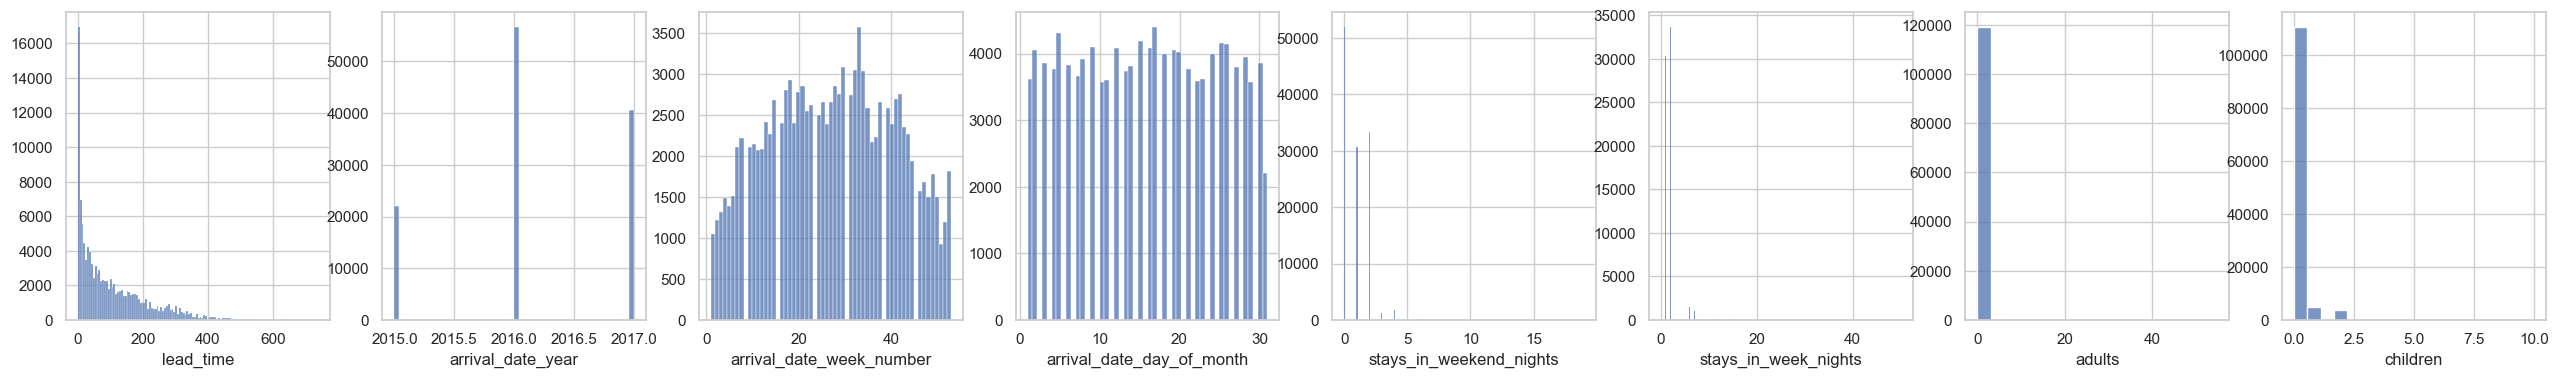

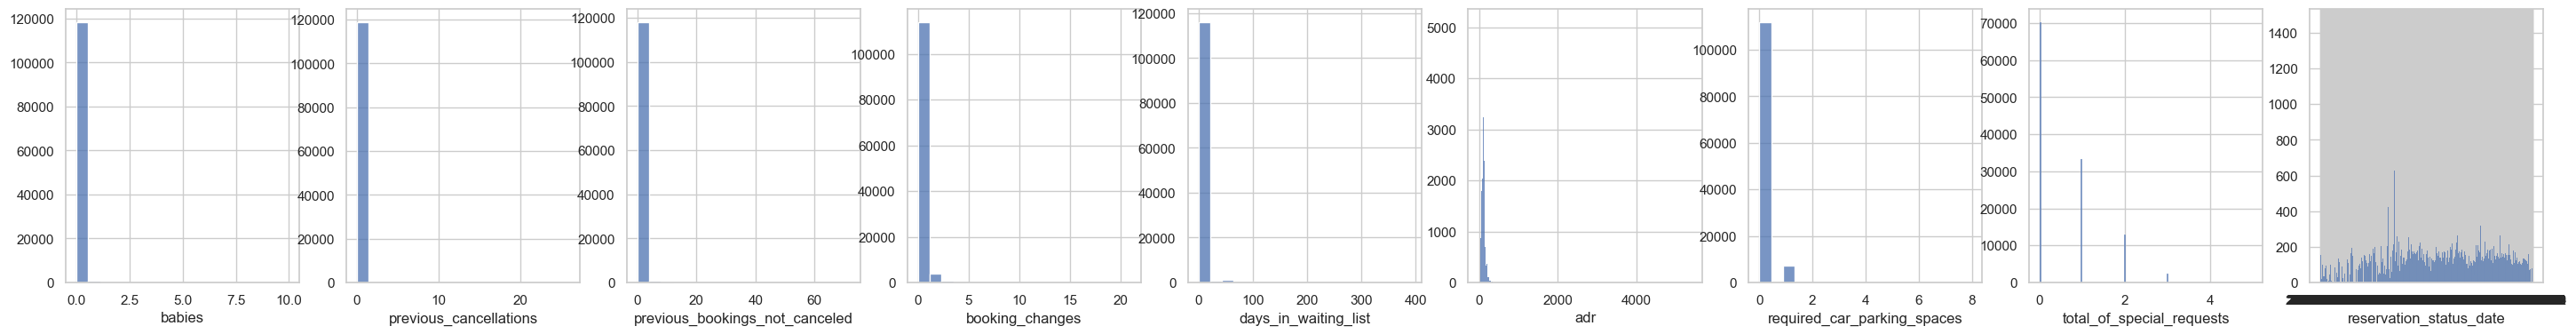

In [6]:
hist(numeric_hotel[:8])
hist(numeric_hotel[8:])

Categorical variables such as country, agent and company has too many categories and most of them are null values.  
There are undefined category in __'meal', 'distribution_channel'__.  
__'Reservation_status'__ has a risk of data leaking.

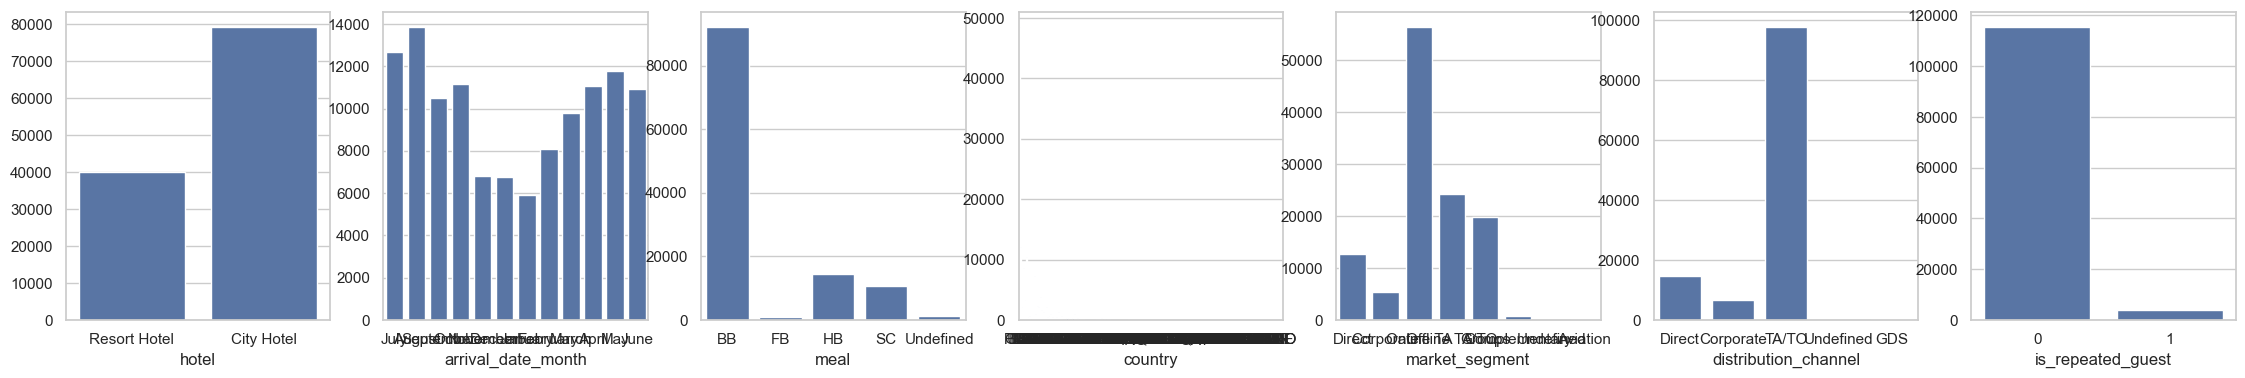

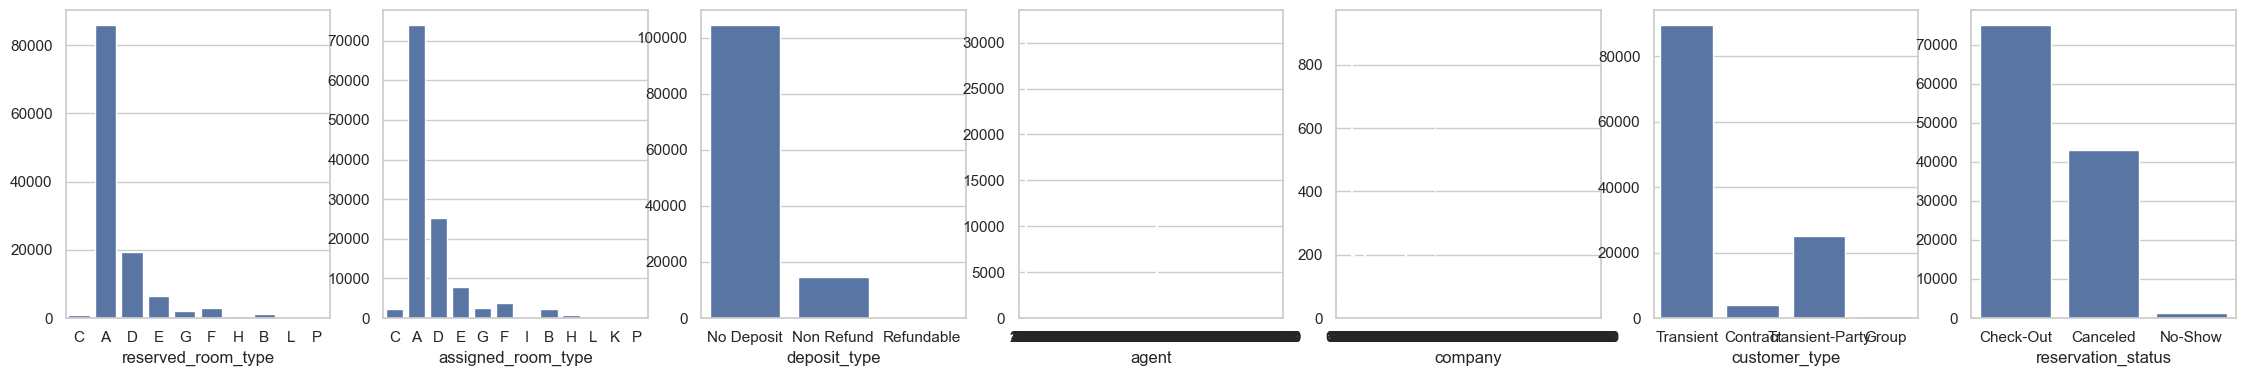

In [7]:
bar(categorical_hotel[:7],hotel_raw)
bar(categorical_hotel[7:],hotel_raw)

Most of the variable is close to a normal distribution. However, __'presip'__ has most value on 0, and __'snowdepth'__ has only one value, __'winddir'__ is right skewed.

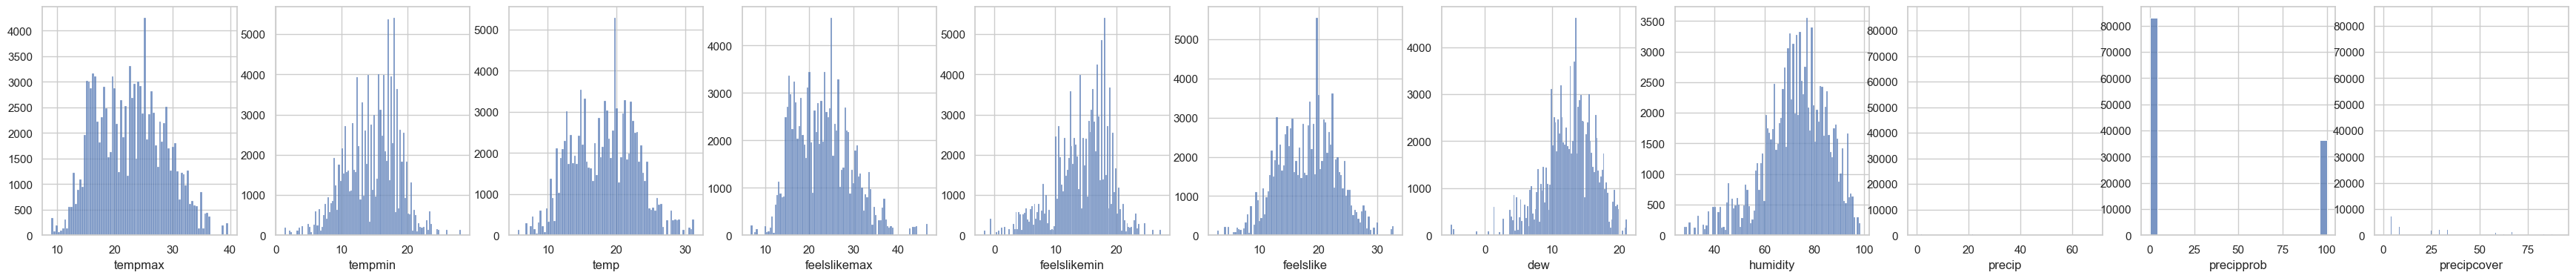

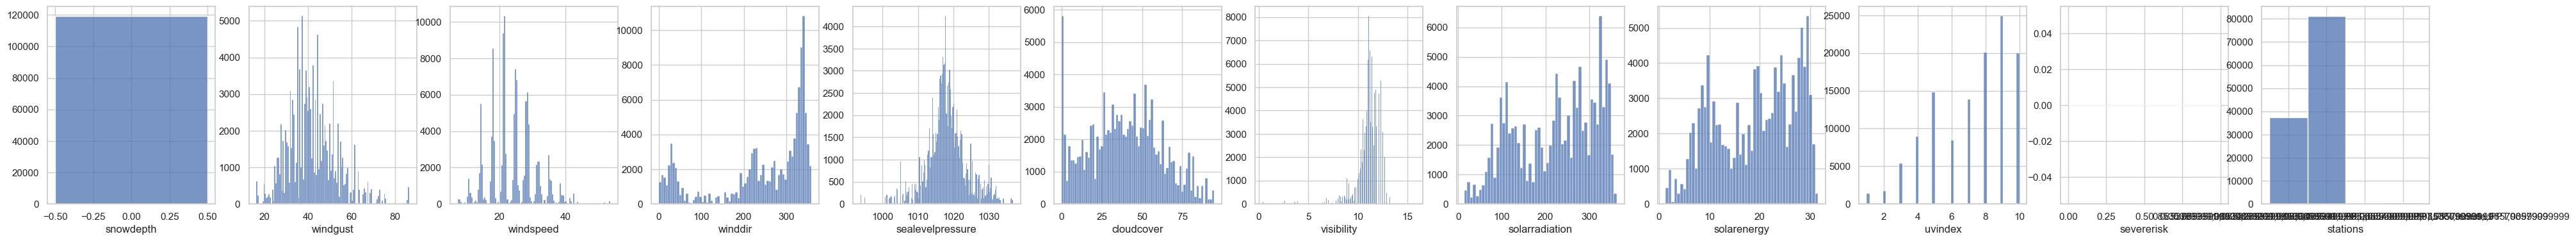

In [8]:
hist(numeric_weather[:11])
hist(numeric_weather[11:])

Variables such as __'name', 'preciptype', 'snow'__ is uni-valued.

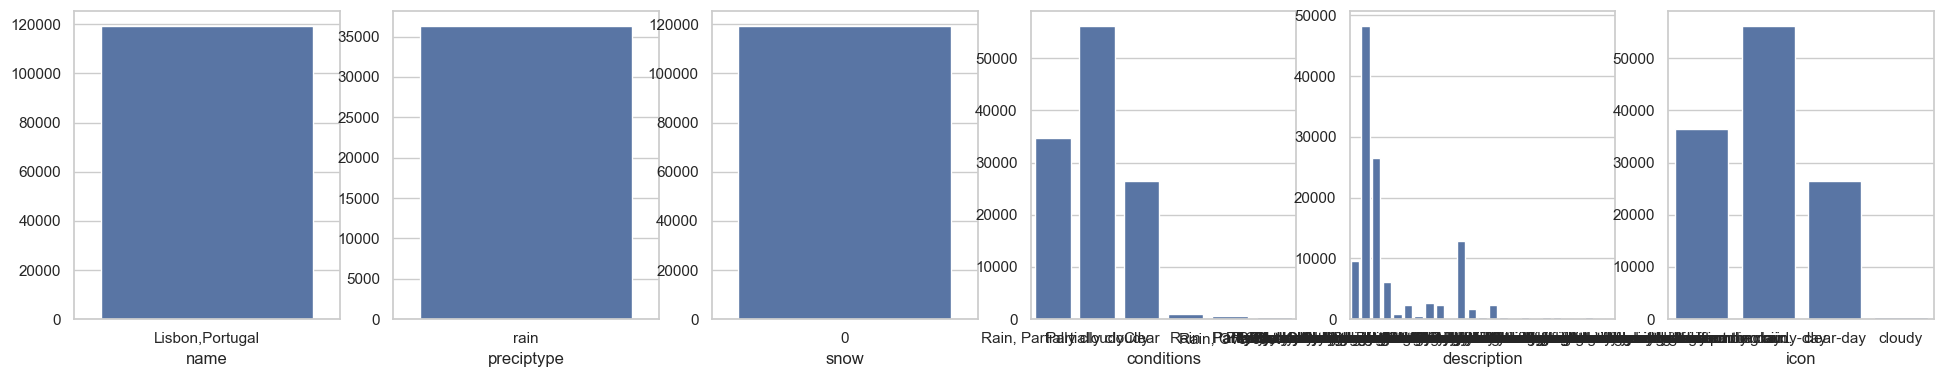

In [9]:
bar(categorical_weather,hotel_raw)

Target Variable
The data is slightly biased and the Null Error Rate is 0.62.

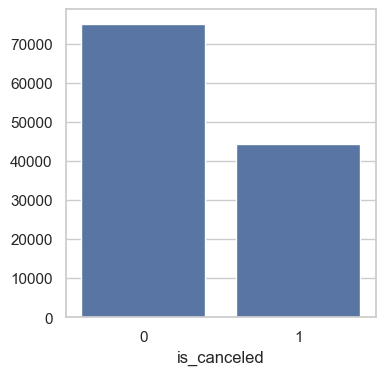

Null Error Rate: 0.6295837172292487


In [10]:
bar(['is_canceled'],hotel_raw)
class_counts = hotel_raw['is_canceled'].value_counts()
null_error_rate = (class_counts.max() / class_counts.sum())

print("Null Error Rate:", null_error_rate)

# 4 Data Preparation

### 4.1 Missing value
Variable __'severerisk', 'company','preciptype'__ has over half more null values, hence we will drop the column.
Variable __'country', 'children'__ has relatively small amount of null values, we will drop the observation with null values.

severerisk     119390
company        112593
preciptype      83059
agent           16340
country           488
children            4
Unnamed: 0          0
precipprob          0
snow                0
precipcover         0
dtype: int64

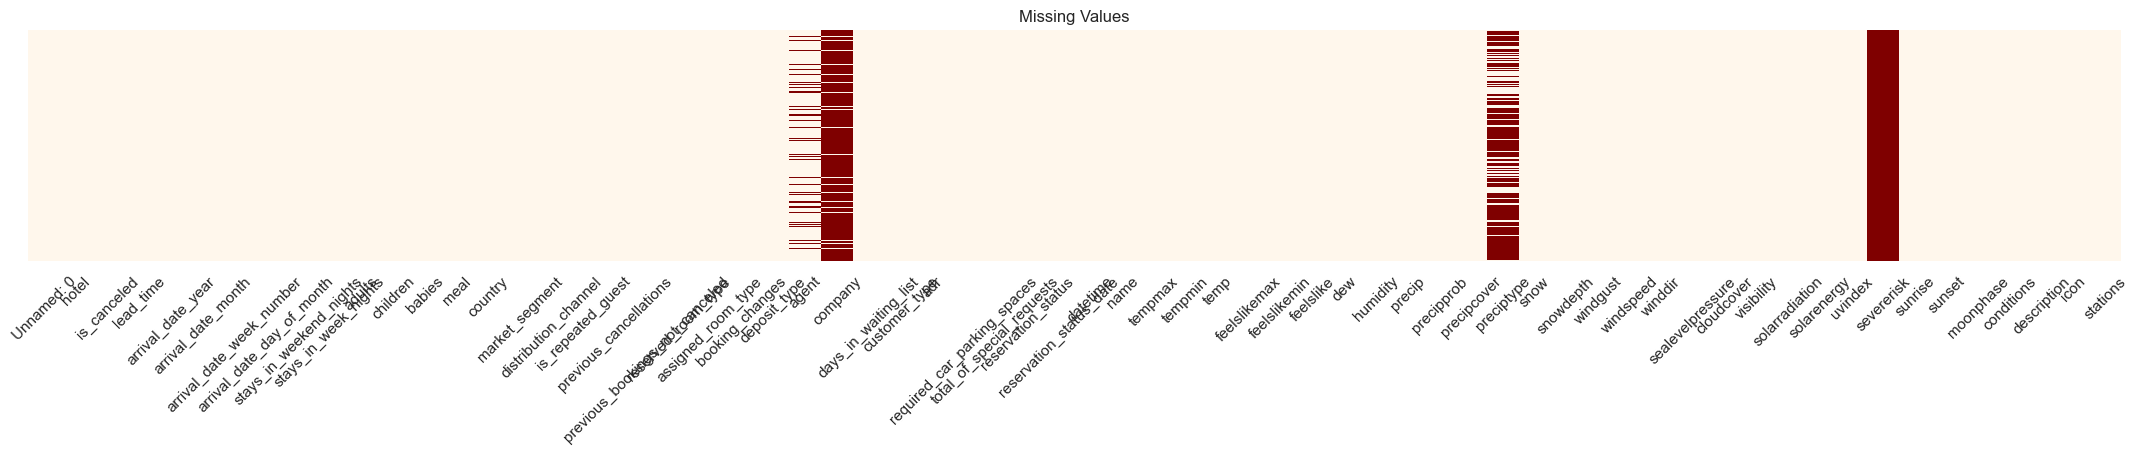

In [11]:
plt.rcParams["figure.figsize"] = (27, 3)
sns.heatmap(hotel_raw.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing Values")
plt.xticks(rotation=45)
display(hotel_raw.isnull().sum().sort_values(ascending=False).head(10))

hotel_raw.drop(columns=['severerisk', 'company','preciptype'], inplace=True)
hotel_raw.dropna(subset=['country', 'children'], inplace=True)

Remove the undefined category from dataset.

In [12]:
hotel_raw = hotel_raw[(hotel_raw['meal'] != 'Undefined') | (hotel_raw['distribution_channel'] != 'Undefined')]

### 4.2 Outliers
Calculate the interquartile range (IQR), data points that fall below the first quartile or above the third quartile are considered outliers and will be removed.
For variable 'children', 'babies' and 'adr', remove the outliers manually.

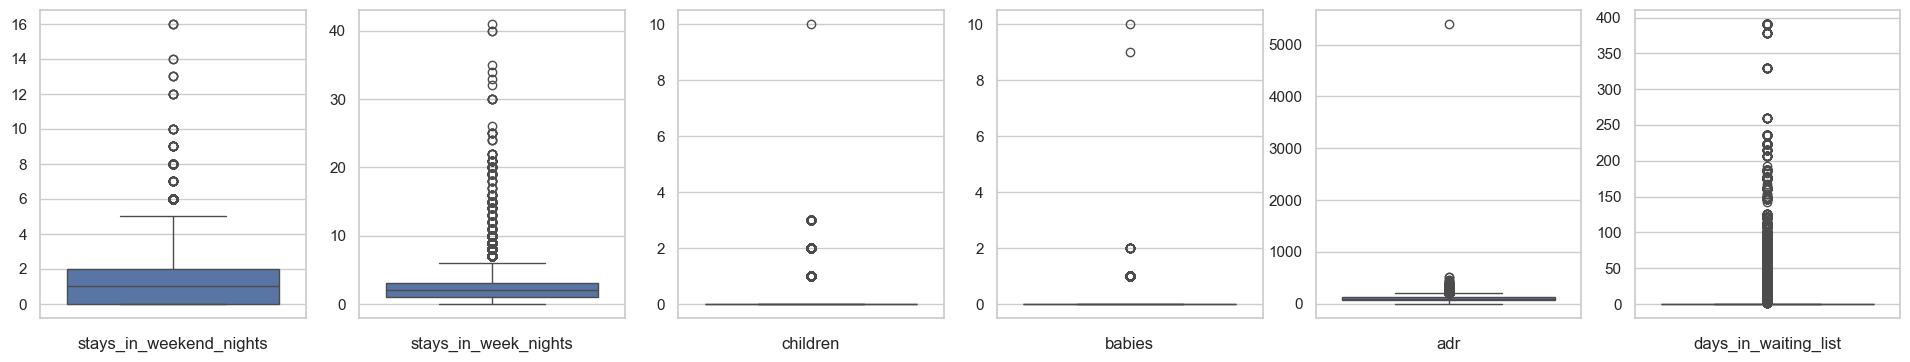

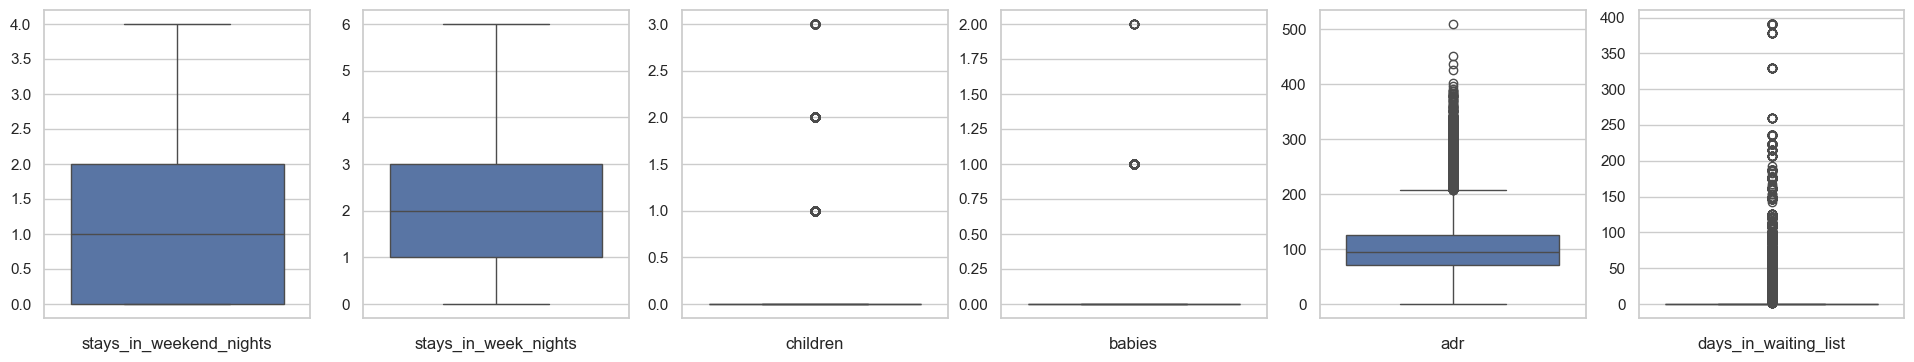

In [13]:
box(['stays_in_weekend_nights','stays_in_week_nights','children','babies','adr','days_in_waiting_list'])
columns_to_clean = ['stays_in_weekend_nights','stays_in_week_nights','previous_bookings_not_canceled']
for attribute in columns_to_clean:
    Q1 = hotel_raw[attribute].quantile(0.25)
    Q3 = hotel_raw[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    hotel_raw = hotel_raw[(hotel_raw[attribute] >= lower_bound) & (hotel_raw[attribute] <= upper_bound)]

hotel_raw = hotel_raw[hotel_raw['children'] < 10]
hotel_raw = hotel_raw[hotel_raw['babies'] < 8]
hotel_raw = hotel_raw[hotel_raw['adr'] < 1000]
box(['stays_in_weekend_nights','stays_in_week_nights','children','babies','adr','days_in_waiting_list'])

### 4.3 Feature Selection
- __'Unnamed: 0'__ will be dropped since it is the index of dataset;  
- __'agent' and 'stations'__ contains ID that has no meaning;  
- __'reservation__status','reservation__status__date'__ has potential data leak;  
- __'name','snow','snowdepth'__ has only one value.
- __'arrival__date__year', 'arrival__date__week__number', 'arrival__date__month', 'arrival__date__day__of__month'__ contains same information as __'datetime'__;  
- __'reserved__room__type' and 'assigned__room__type'__ are similar and wetransform them into a new binary variable __'reserved__room__change'__;  
- __'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin','feelslike'__ provide similar information on temperature. We will keep only 'temp';  
- __'dew', 'humidity', 'precip', 'precipprob', 'precipcover'__ provide similar information on rain. We keep only __'precipprob'__. And __'precipprob'__ has value only of 0 and 100 and with rain as the only preciptype, we will make it a binary variable 'rain';  
- __'windgust', 'windspeed', 'winddir'__ provide similar information on wind and we keep only __'windspeed'__;  
- __'cloudcover','solarradiation', 'solarenergy', 'uvindex'__ provide similar information on sun and we keep only 'uvindex'__;  
- __'sunrise','sunset', 'conditions', 'description', 'icon'__ are time information and combined information of previous variables.




In [14]:
hotel_raw['reserved_room_change'] = 0
hotel_raw.loc[hotel_raw['reserved_room_type'] != hotel_raw['assigned_room_type'], 'reserved_room_change'] = 1
hotel_raw['rain'] = 0
hotel_raw.loc[hotel_raw['precipprob'] == 100, 'rain'] = 1
columns_to_drop = ['Unnamed: 0','country', 'agent', 'stations','reservation_status','reservation_status_date','name','snow','snowdepth', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_month', 'arrival_date_day_of_month','reserved_room_type', 'assigned_room_type','tempmax', 'tempmin','feelslikemax', 'feelslikemin','feelslike','dew', 'humidity', 'precip', 'precipprob', 'precipcover','windgust', 'winddir','cloudcover','solarradiation', 'solarenergy','sunrise','sunset', 'conditions', 'description', 'icon']
hotel_cleaned = hotel_raw.drop(columns=columns_to_drop)

In [15]:
categorical_columns = ['hotel','meal','deposit_type','customer_type','distribution_channel','market_segment']
categorical_data = hotel_cleaned[categorical_columns]
dummy_variables = pd.get_dummies(categorical_data, columns=categorical_columns)

numeric_columns = [col for col in hotel_cleaned.columns if col not in categorical_columns]
numeric_data = hotel_cleaned[numeric_columns]

hotel = pd.concat([numeric_data, dummy_variables], axis=1)
hotel.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA
0,0,342,0,0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,0,737,0,0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,0,7,0,1,1,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,0,13,0,1,1,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
4,0,14,0,2,2,0.0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,True


### 4.4 Data Transform


In [16]:
X = hotel.drop('is_canceled', axis=1)
X = X[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'temp', 'windspeed', 'visibility', 'reserved_room_change', 'hotel_City Hotel', 'meal_BB', 'meal_HB', 'deposit_type_No Deposit', 'customer_type_Transient', 'distribution_channel_GDS', 'market_segment_Offline TA/TO', 'market_segment_Online TA']]
X_no_datetime = hotel.drop(['is_canceled','datetime'], axis=1)
y = hotel['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(X_no_datetime, y, test_size=0.2, random_state=37)

Step forward feature selection for training data.

In [17]:
# sfs = SFS(RandomForestClassifier(), 
#           k_features=20, 
#           forward=True, 
#           floating=False, 
#           verbose=2,
#           scoring='roc_auc',
#           cv=3)
# from sklearn.utils import parallel_backend

# n_jobs = 4  # Adjust this number based on your system's resources

# with parallel_backend('threading', n_jobs=n_jobs):
#     sfs = sfs.fit(X_train_nt, y_train_nt)


# selected_features = list(sfs.k_feature_idx_)

# if isinstance(X_train_nt, pd.DataFrame):
#     selected_feature_names = X_train_nt.columns[list(sfs.k_feature_idx_)].tolist()
#     print("Selected feature names:", selected_feature_names)



# 5. Prepped Data Overview

In [18]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations',
           'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'temp',
           'windspeed', 'visibility', 'reserved_room_change', 'hotel_City Hotel', 'meal_BB', 'meal_HB',
           'deposit_type_No Deposit', 'customer_type_Transient', 'distribution_channel_GDS', 
           'market_segment_Offline TA/TO', 'market_segment_Online TA']
df_selected = hotel[columns]

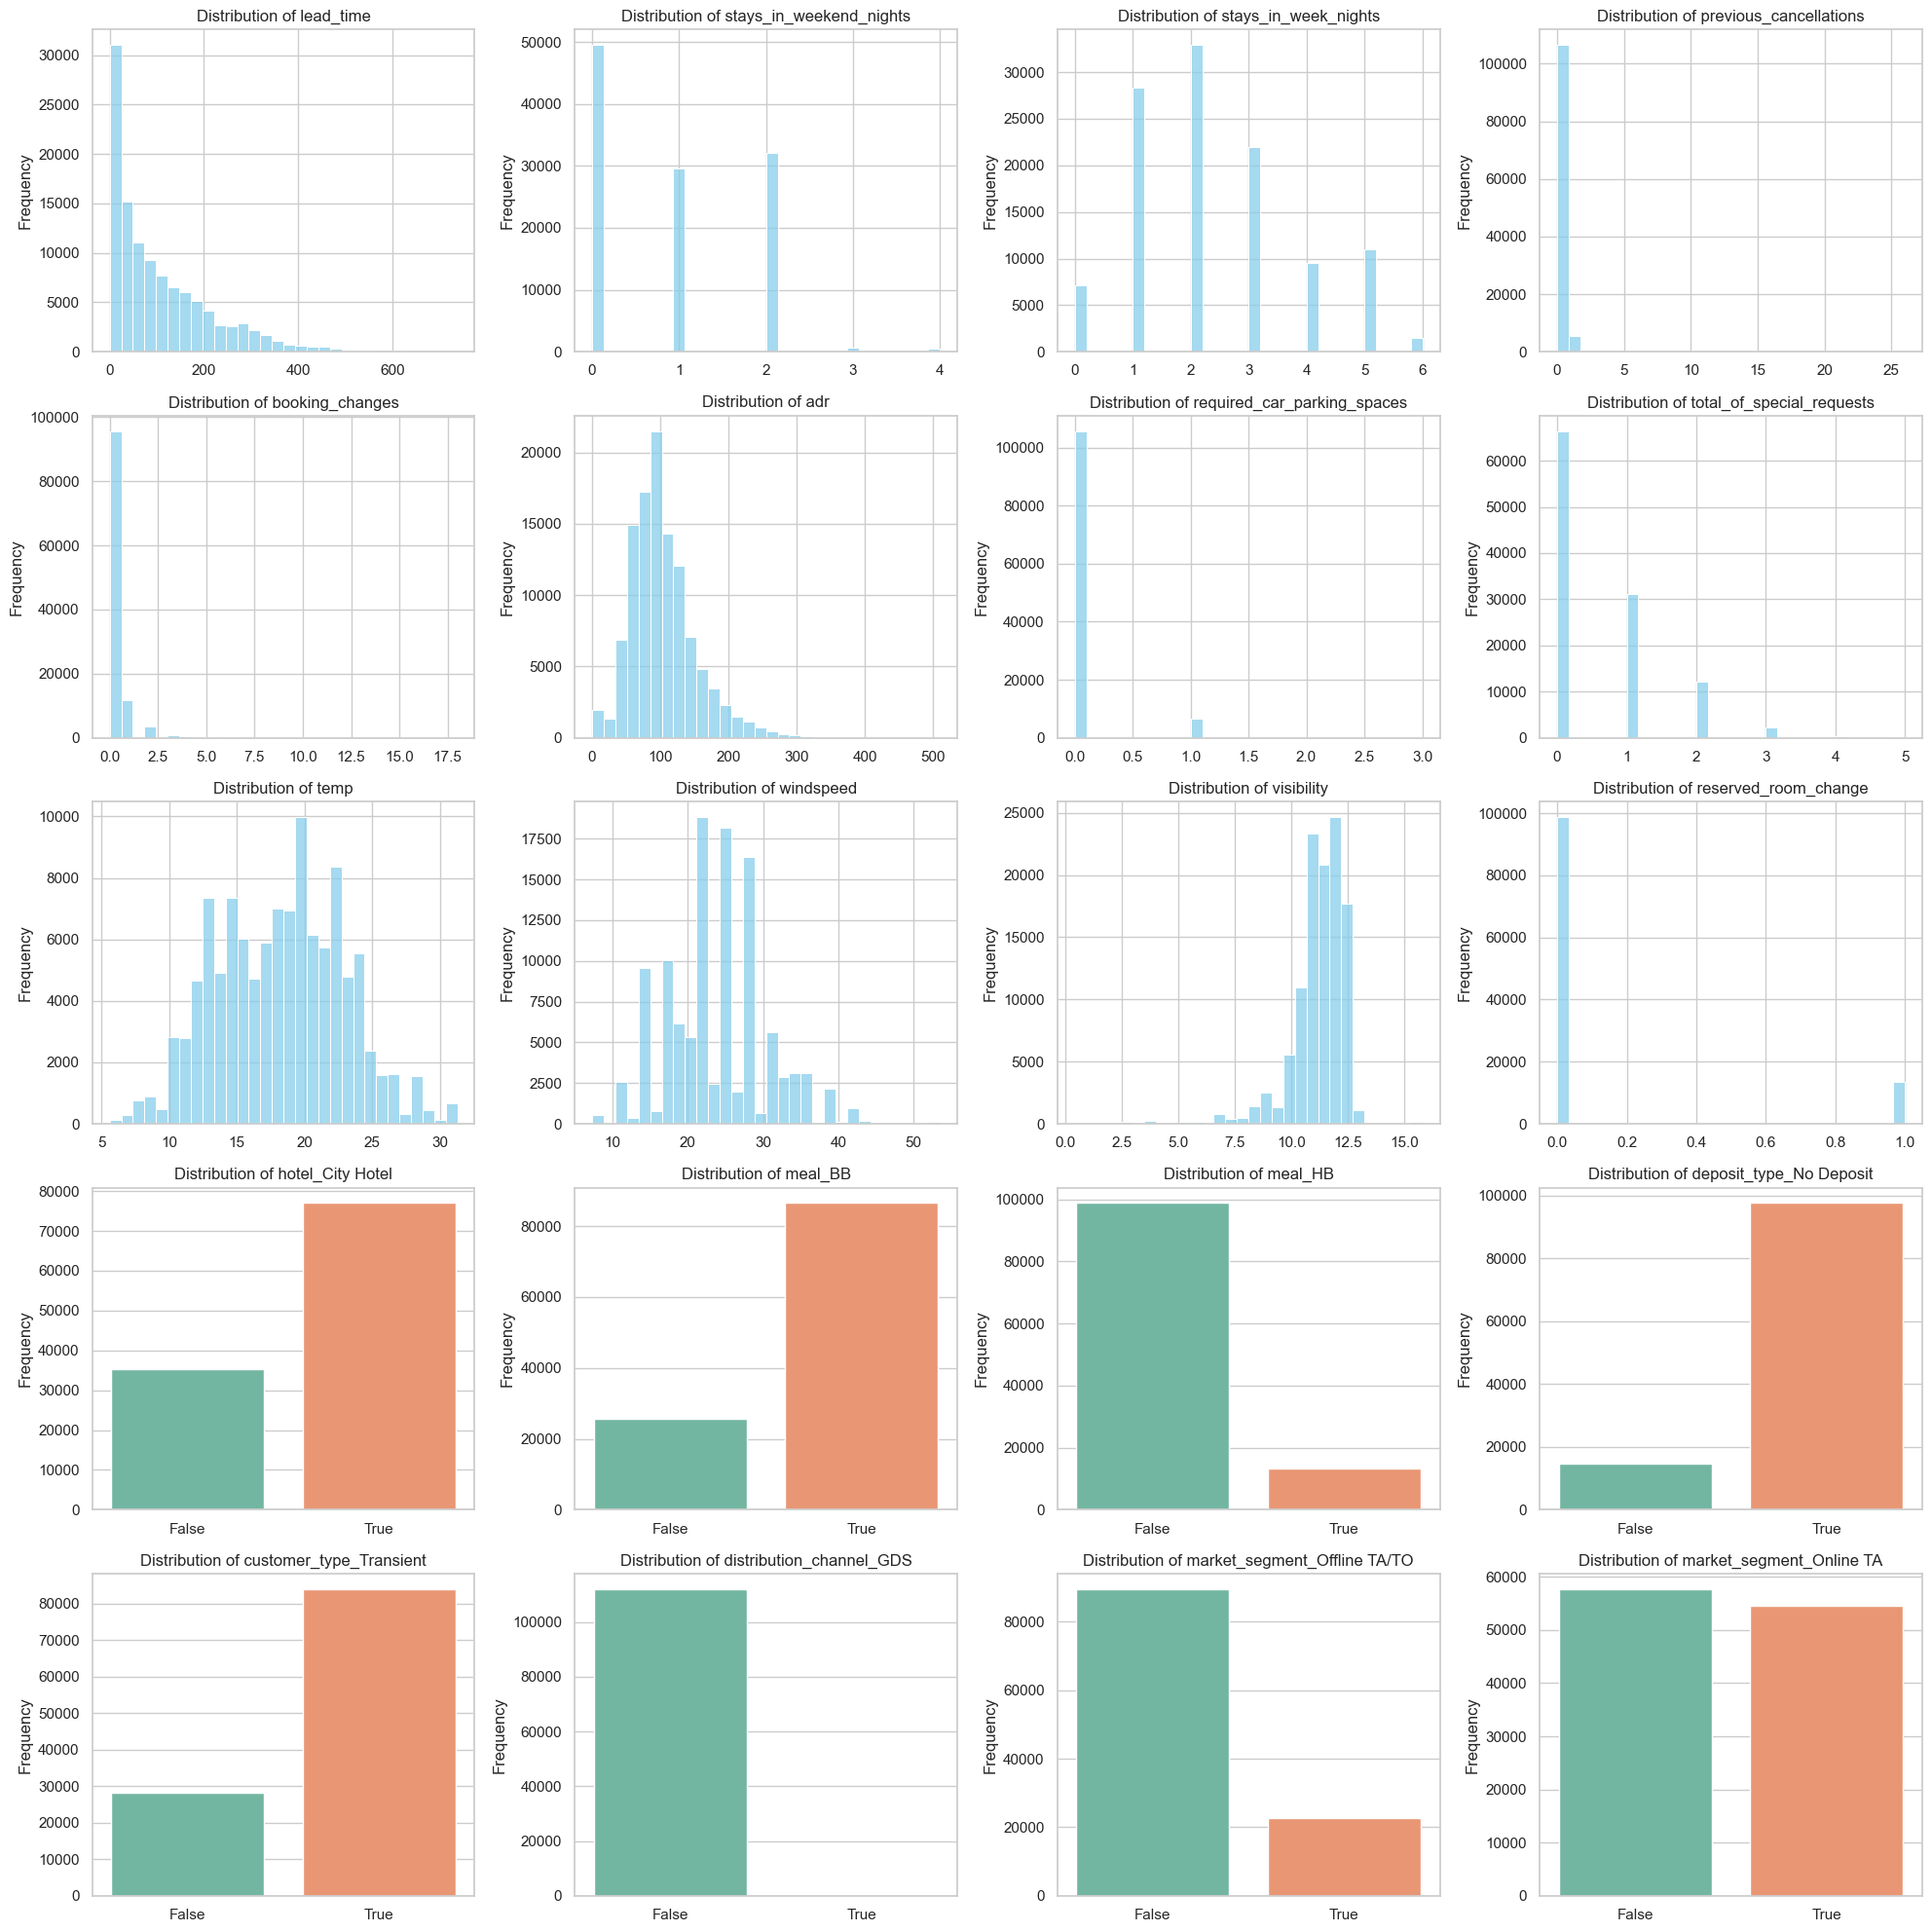

In [19]:
# Set the size of the figsize
plt.figure(figsize=(20, 20))

# Loop through each column
for i, col in enumerate(df_selected.columns):
    plt.subplot(5, 4, i + 1)  # Adjust the subplot layout
    # Check the data type; if it is numerical, continue using histograms
    if df_selected[col].dtype in ['int64', 'float64']:
        sns.histplot(df_selected[col], kde=False, bins=30, color='skyblue')
    else:
        # For categorical data, use bar charts
        sns.countplot(x=col, data=df_selected, palette='Set2') 
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [20]:
df_selected['is_canceled'] = hotel['is_canceled']

/var/folders/bz/shq74ng152xd2xvygh6vtv940000gn/T/ipykernel_4469/3314176195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['is_canceled'] = hotel['is_canceled']


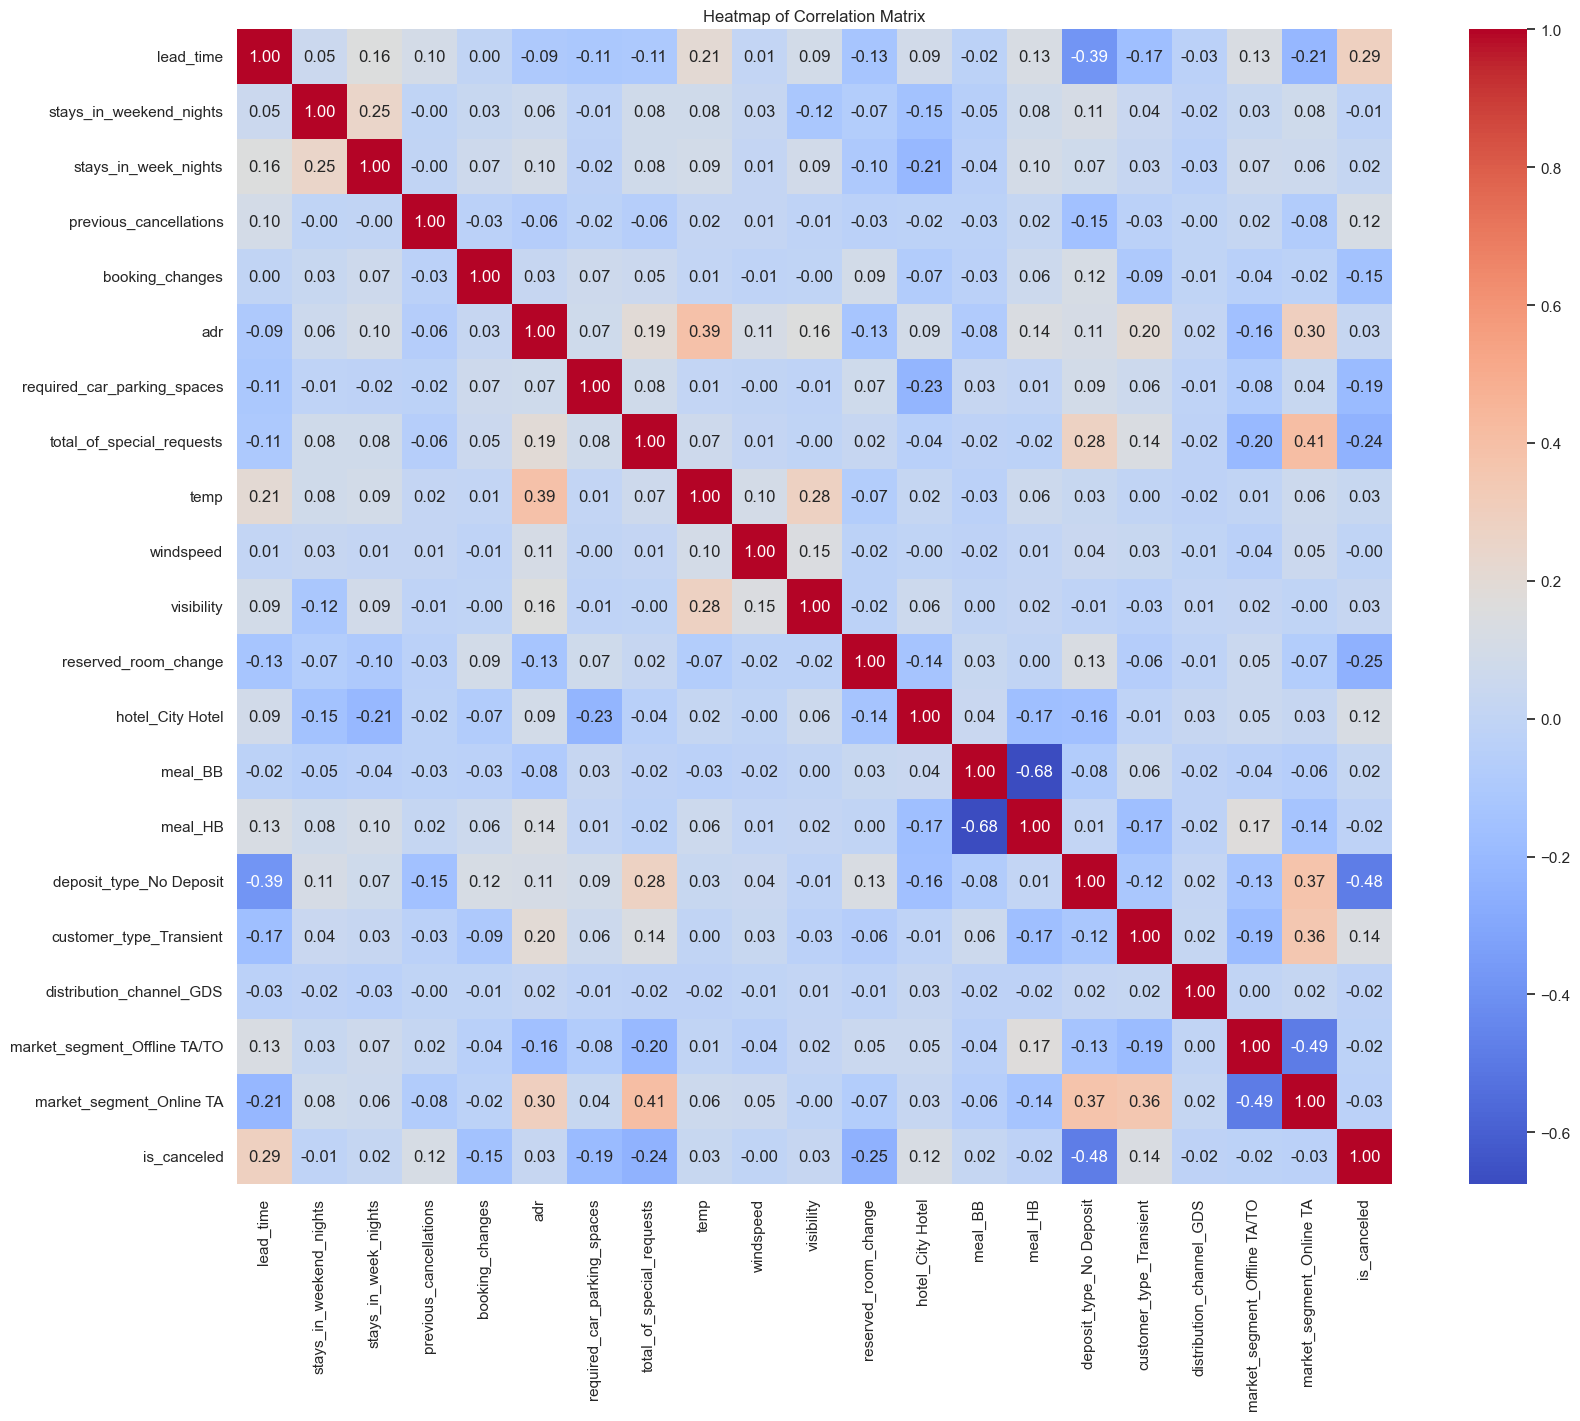

In [21]:
corr = df_selected.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


# 6. Models

## 6.1 ARIMA Model

#### Daily SARIMA

- Time Series Transformation

In order to better help Hotel manage the bookings and make a schedule of the future hotel Resources. We use time series and SARIMA model to do the prediction. We set the datetime as the time series and count the numbers of the bookings from 2015-7 to 2017-10.

In [22]:
hotel.set_index('datetime', inplace=True)

# Create daily bookings time series
daily_bookings = hotel.resample('D').size()

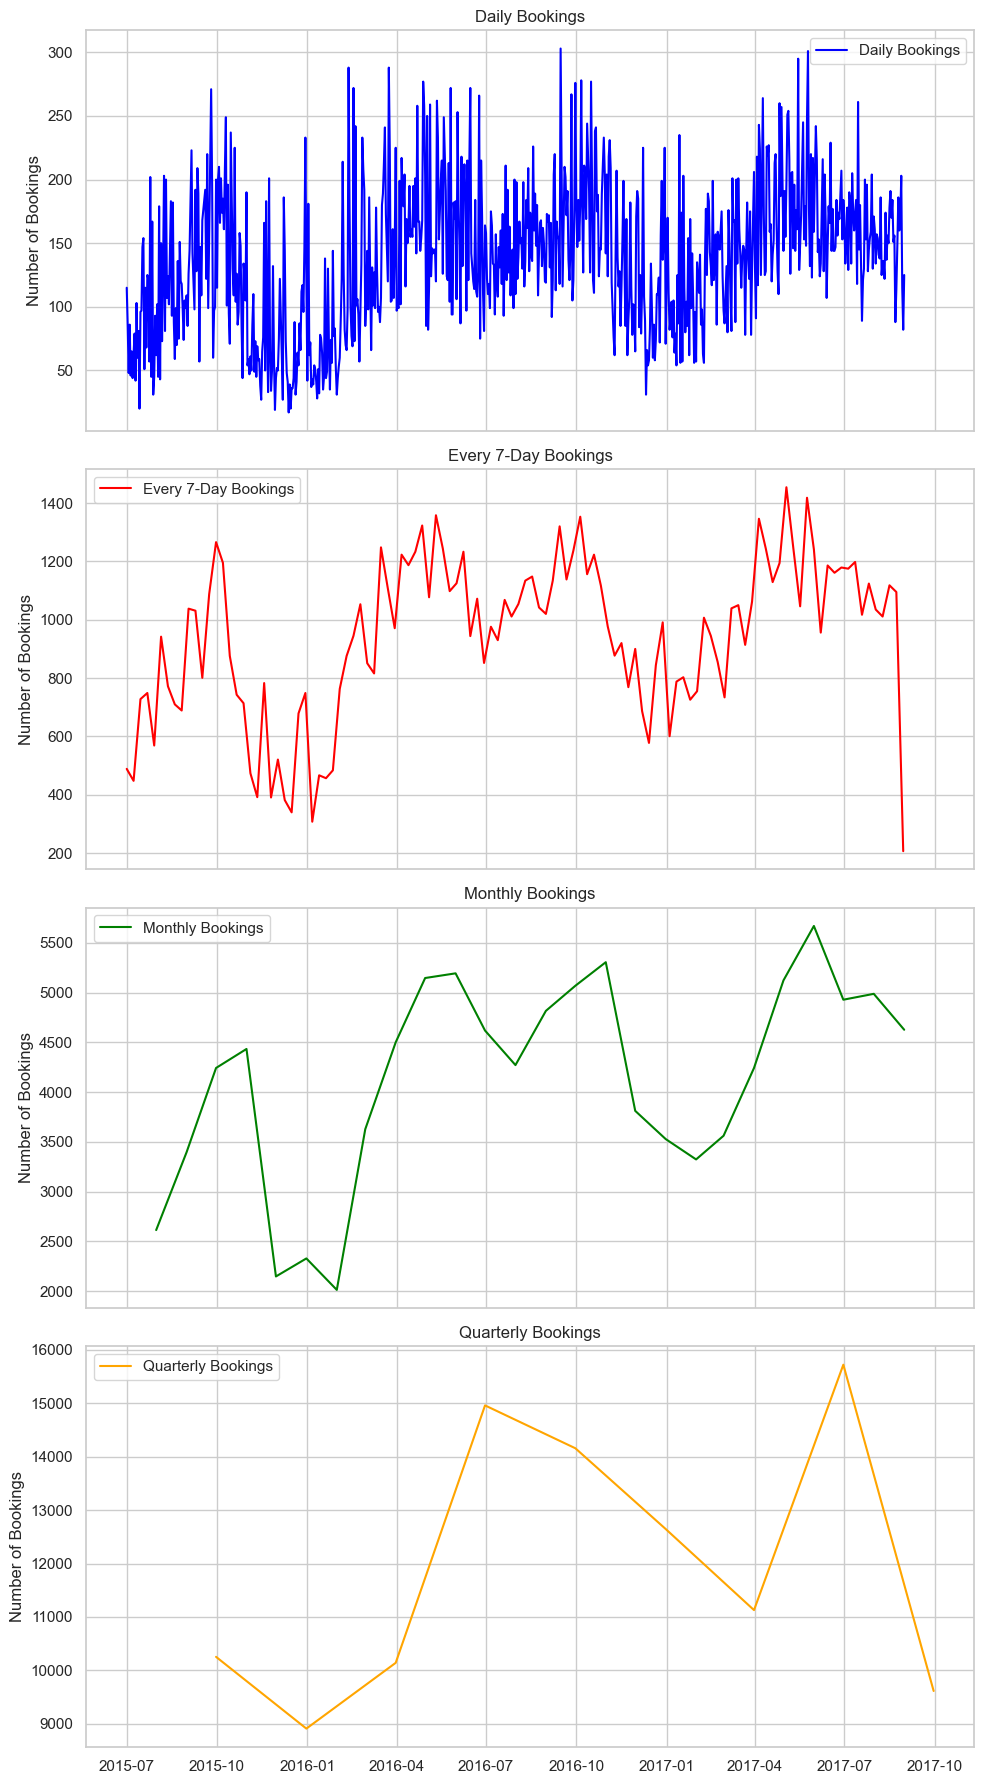

In [66]:
# Create DataFrame
daily_bookings_df = pd.DataFrame(daily_bookings, columns=['bookings'])

# Calculate monthly and quarterly booking volumes
monthly_bookings = daily_bookings_df['bookings'].resample('M').sum()
quarterly_bookings = daily_bookings_df['bookings'].resample('Q').sum()

# Plot daily bookings, every 7 days, monthly, and quarterly bookings
fig, axs = plt.subplots(4, 1, figsize=(10, 18), sharex=True)

# Daily bookings
axs[0].plot(daily_bookings_df['bookings'], label='Daily Bookings', color='blue')
axs[0].set_title('Daily Bookings')
axs[0].set_ylabel('Number of Bookings')
axs[0].legend()

# Every 7-day bookings
axs[1].plot(daily_bookings_df['bookings'].resample('7D').sum(), label='Every 7-Day Bookings', color='red')
axs[1].set_title('Every 7-Day Bookings')
axs[1].set_ylabel('Number of Bookings')
axs[1].legend()

# Monthly bookings
axs[2].plot(monthly_bookings.index, monthly_bookings, label='Monthly Bookings', color='green')
axs[2].set_title('Monthly Bookings')
axs[2].set_ylabel('Number of Bookings')
axs[2].legend()

# Quarterly bookings
axs[3].plot(quarterly_bookings.index, quarterly_bookings, label='Quarterly Bookings', color='orange')
axs[3].set_title('Quarterly Bookings')
axs[3].set_ylabel('Number of Bookings')
axs[3].legend()

plt.tight_layout()
plt.show()


- Outliers

There are 5 outliers which maybe related to the some events. So we reomve the outliers to better fit the models.

In [23]:
# Calculate Q1 and Q3
Q1 = daily_bookings.quantile(0.25)
Q3 = daily_bookings.quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check if the boundaries are reasonable
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -26.5
Upper Bound: 305.5


In [24]:
daily_bookings = daily_bookings.where((daily_bookings >= lower_bound) & (daily_bookings <= upper_bound))

# Check if any data is retained
if daily_bookings.dropna().empty:
    print("All data identified as outliers, please adjust the definition of outliers.")
else:
    daily_bookings = daily_bookings.dropna()

- Seasonal Decompose

We used seasonal_decompose to observe the trend, seasonal changes and its residuals, and finally determined that a period of 30 can produce better seasonal changes.

__Trend:__ The trend component shows the long-term trend of the time series. From the figure, we can see that the trend is relatively stable overall, but there are slight fluctuations.  

__Seasonal:__ The seasonal component reveals the periodic fluctuations of the data, which are repeated patterns with fixed frequency and amplitude. From the figure, the seasonal changes are very regular, suggesting that we consider seasonal components in the model. 

__Residual:__ The residual component shows the random fluctuations after removing the trend and seasonality. The fluctuations in the residual graph are relatively random, which is an ideal state, indicating that the model has captured the trend and seasonality in the data well.

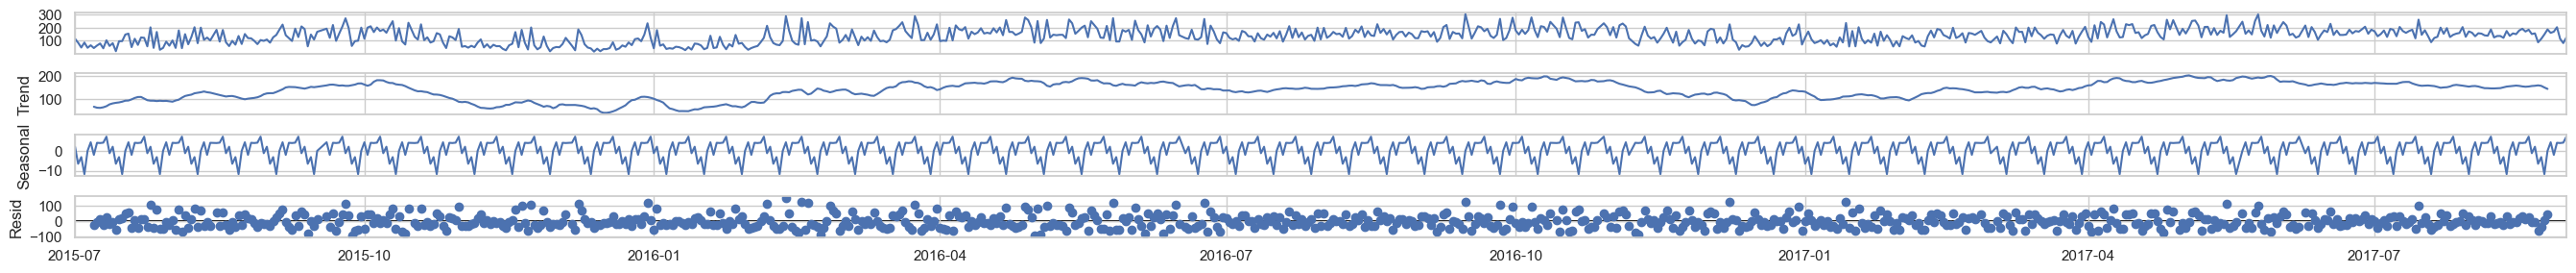

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
daily_seasonal = seasonal_decompose(daily_bookings, model='additive', period=12)

# Plot the results
fig = daily_seasonal.plot()
plt.show()

Next, let's check whether the data is stable. We can use adfuller function to do the ADF stationarity test. The result shows that the p-value is over 0.05. So we need to apply first-order differencing and check the stationarity of the resulting data.

- ADF

In [26]:
# Perform ADF stationarity test
from statsmodels.tsa.stattools import adfuller
daily_ADF = adfuller(daily_bookings)
print('ADF Statistic: %f' % daily_ADF[0])
print('p-value: %f' % daily_ADF[1])

ADF Statistic: -2.214810
p-value: 0.200914


In [27]:
# Perform first differencing on the data
daily_bookings_diff = daily_bookings.diff().dropna()

# Repeat the ADF test
result_diff = adfuller(daily_bookings_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -11.332986
p-value: 0.000000


- ACF & PACF

Next, Let's use ACF and PACF plot to decide the p, d, q and P, D, Q, M values.

__Non-seasonal parameters:__  
__p=0__ (AR order): As the PACF plot shows a rapid approach to zero after the first lag, set p=0.  
__d=1__ (Differencing order): Given that the trend component of the original data is relatively stable and has been differenced, set d=1.  
__q=1__ (MA order): The ACF plot shows significance at the first lag, therefore set q=1.  

__Seasonal parameters:__  
__P=0__ (Seasonal AR order): The seasonal PACF does not show significant truncation or tailing.  
__D=1__(Seasonal differencing order): To ensure the stationarity of the seasonal component.  
__Q=1__ (Seasonal MA order): The seasonal ACF indicates a seasonal pattern.  
__M=30__ (Period): Our cycle essentially reflects an annual repetition, but setting it to 365 is too large, so we use 30 to start modeling. 


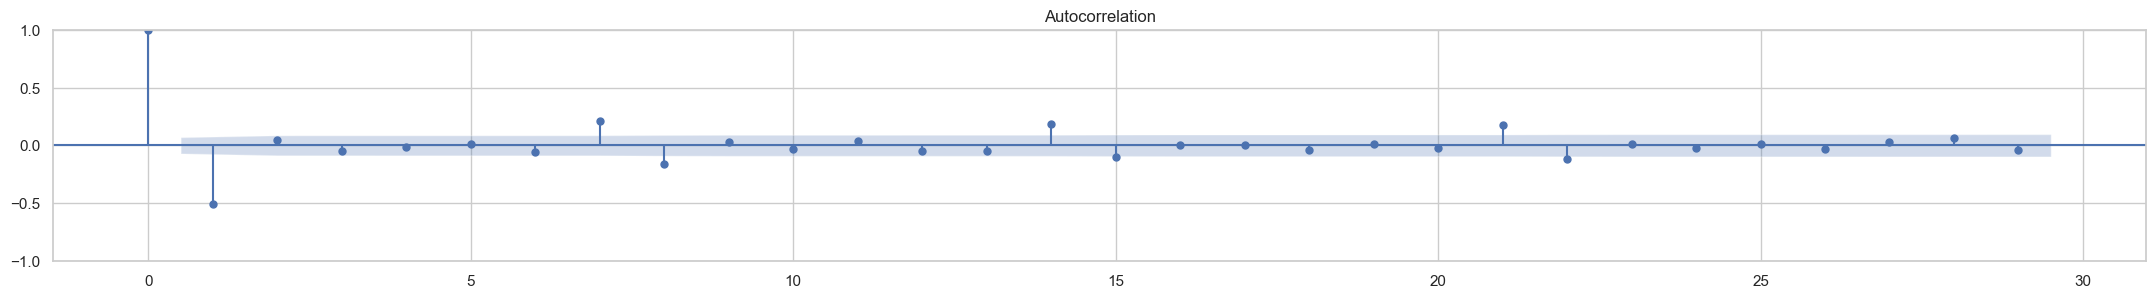

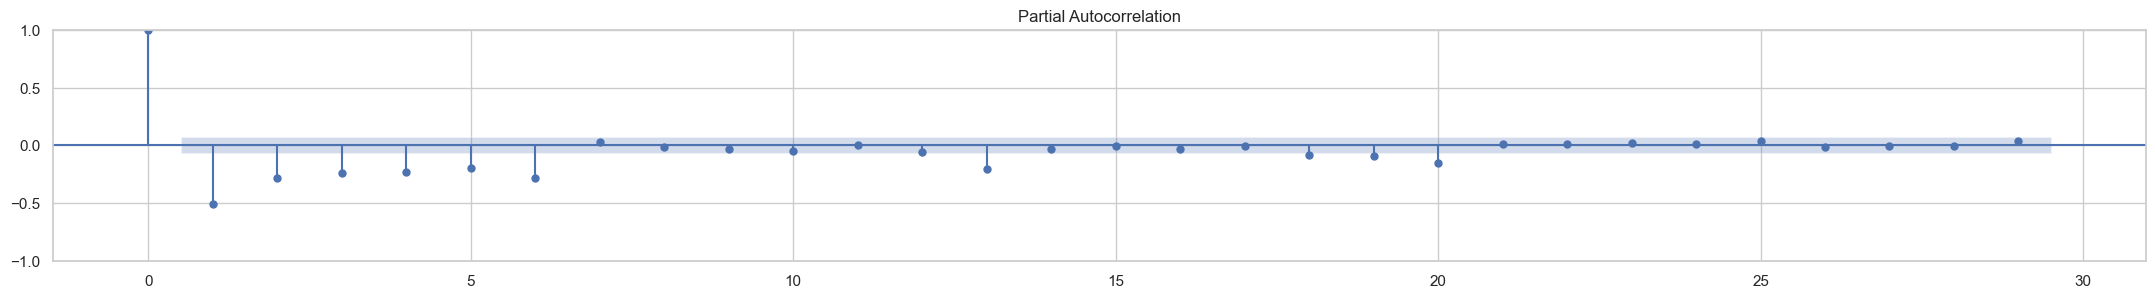

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(daily_bookings_diff)
plot_pacf(daily_bookings_diff)
plt.show()

- Daily SARIMA Model

In [29]:
dailyly_bookings_log = np.log(daily_bookings_diff + abs(min(daily_bookings_diff)) + 1)

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build and fit the SARIMA model, just a starting parameter setting example here
sarima_model_daily = SARIMAX(dailyly_bookings_log, 
                       order=(0, 1, 1), 
                       seasonal_order=(0, 1, 1, 30))
sarima_result_daily = sarima_model_daily.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14640D+00    |proj g|=  7.61946D-01


 This problem is unconstrained.



At iterate    5    f=  6.91704D-01    |proj g|=  4.09582D-02

At iterate   10    f=  6.36604D-01    |proj g|=  2.01350D-02

At iterate   15    f=  6.30114D-01    |proj g|=  1.13358D-02

At iterate   20    f=  6.29663D-01    |proj g|=  1.33503D-02

At iterate   25    f=  6.29621D-01    |proj g|=  7.85467D-04

At iterate   30    f=  6.29620D-01    |proj g|=  1.32311D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     43      1     0     0   2.520D-07   6.296D-01
  F =  0.62961942595029941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [31]:
print(sarima_result_daily.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  778
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood                -489.844
Date:                            Sat, 04 May 2024   AIC                            985.688
Time:                                    23:22:58   BIC                            999.536
Sample:                                         0   HQIC                           991.025
                                            - 778                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.365     -2.740      0.006      -1.715      -0.285
ma.S.L30      -0.9979      1.153   

In [32]:
# Perform in-sample predictions
predictions = sarima_result_daily.get_prediction(start=dailyly_bookings_log.index[0], end=dailyly_bookings_log.index[-1])
predicted_means = predictions.predicted_mean

# Since a logarithmic transformation was applied, restore the predictions to their original scale
predicted_means = np.exp(predicted_means) - abs(min(daily_bookings_diff)) - 1

# Retrieve the actual values (restoring the log-transformed actual values to their original scale)
actual_values = np.exp(dailyly_bookings_log) - abs(min(daily_bookings_diff)) - 1


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_means)
print(f"MSE: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

MSE: 10628.771195526337
RMSE: 103.09593200280182


#### Monthly SARIMA

- Time Series Transformation

In [34]:
# Aggregate to monthly data and calculate the total number of bookings per month
monthly_bookings = daily_bookings.resample('M').sum()  # Total number of bookings per month

- Outliers

In [35]:
Q1 = monthly_bookings.quantile(0.25)
Q3 = monthly_bookings.quantile(0.75)
IQR = Q3 - Q1

# Calculate cutoff points for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove values below the lower bound and above the upper bound
monthly_bookings = monthly_bookings[(monthly_bookings >= lower_bound) & (monthly_bookings <= upper_bound)]
monthly_bookings_log = np.log(monthly_bookings + abs(min(monthly_bookings)) + 1)

- Seasonal Decompose

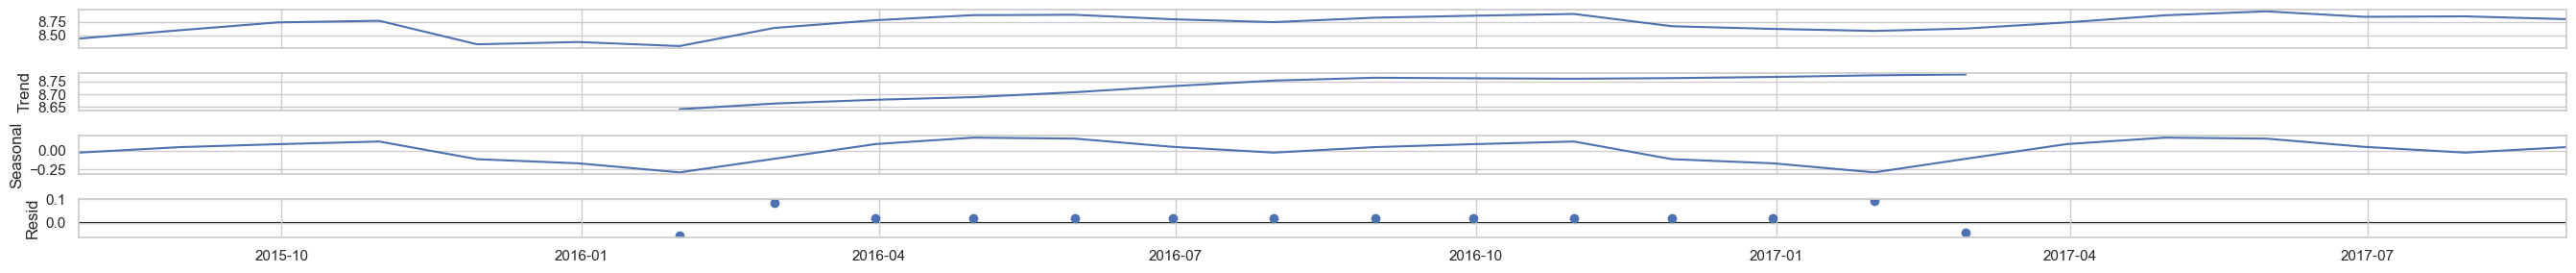

In [54]:
monthly_seasonal = seasonal_decompose(monthly_bookings_log, model='additive', period=12)

# Plot the results
fig = monthly_seasonal.plot()
plt.show()

- ADF

In [55]:
Monthly_ADF = adfuller(monthly_bookings_log)
print('ADF Statistic: %f' % Monthly_ADF[0])
print('p-value: %f' % Monthly_ADF[1])

ADF Statistic: -2.653733
p-value: 0.082392


In [56]:
# Perform first differencing on the data
daily_bookings_diff = monthly_bookings_log.diff().dropna()

# Repeat the ADF test
result_diff = adfuller(daily_bookings_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -3.298767
p-value: 0.014934


- ACF & PACF

__Non-seasonal parameters:__  
__p__ (AR order): The PACF plot shows that after the first lag, all partial autocorrelations are close to zero or insignificant. This suggests that an AR component may not be necessary, hence p=0.  
__d__ (Differencing order): A first difference has been taken, which means d=1, especially if this differencing effectively made the time series stationary.  
__q__ (MA order): The ACF plot shows significant autocorrelation at the first lag, which quickly approaches zero afterwards, so q=1.  
__Seasonal parameters:__  
__P__ (Seasonal AR order): The PACF plot does not show significant seasonal autocorrelation at seasonal lags. Therefore, P can be set to 0.  
__D__ (Seasonal differencing order): If the residuals from a seasonal decomposition still show seasonal fluctuations, seasonal differencing might be necessary. Given that the seasonal component in the plot remains relatively apparent, consider setting D=1.  
__Q__ (Seasonal MA order): The seasonal ACF plot shows that autocorrelation decreases rapidly and stabilizes at seasonal lags, thus Q is set to 0.  
__M__ (Period length): Since the data is aggregated monthly and we are considering an annual cycle, M=12.

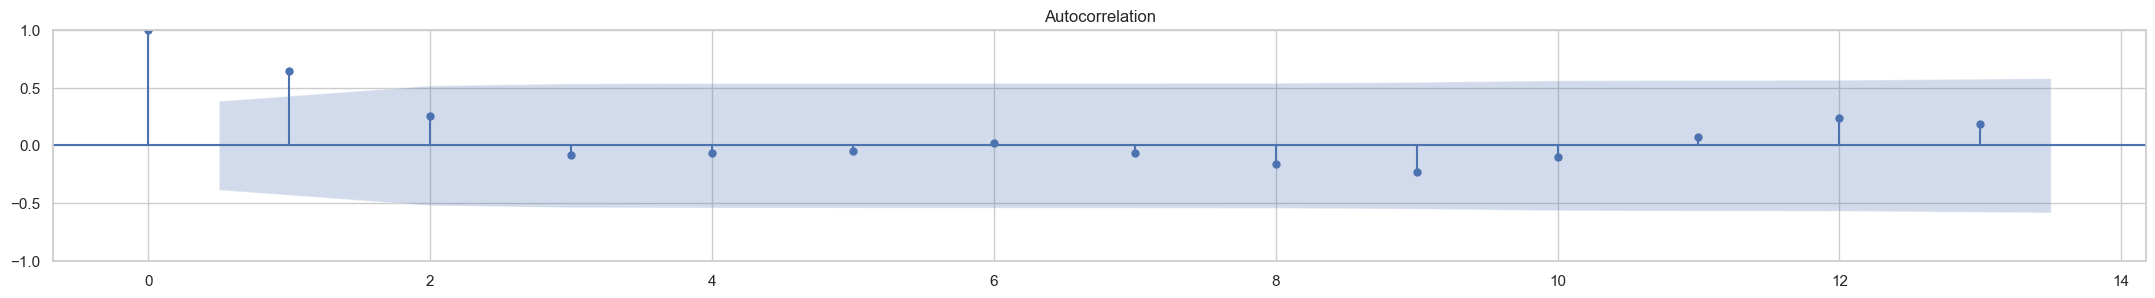

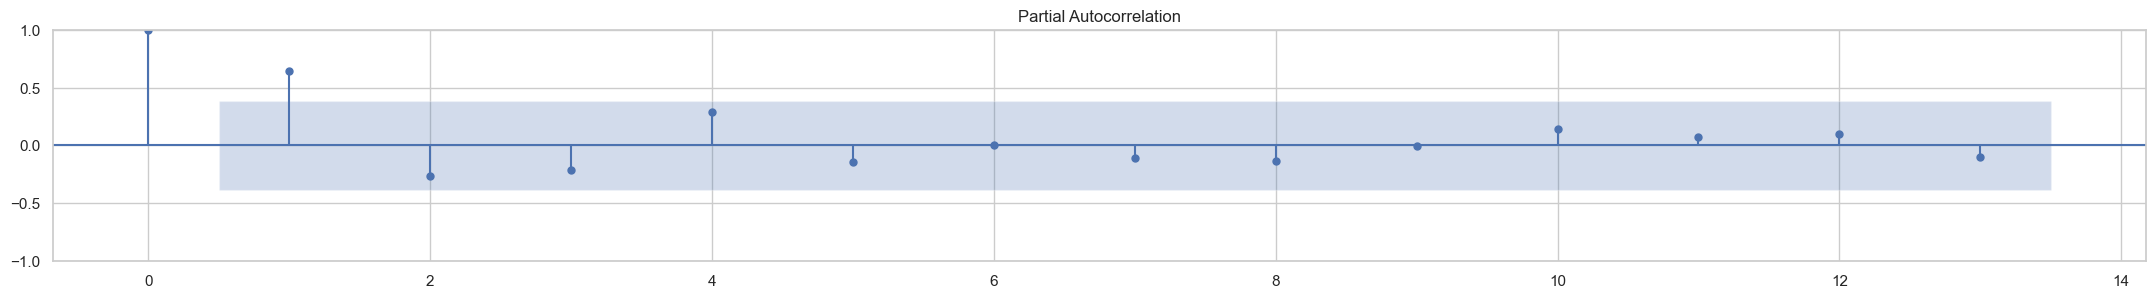

In [57]:
plot_acf(monthly_bookings_log)
plot_pacf(monthly_bookings_log)
plt.show()

- Monthly SARIMA Model

Based on the analysis above, the recommended SARIMA model parameters are (0, 1, 1) x (0, 1, 1, 12). However, after computation, the AIC and BIC values have significantly decreased compared to previous models, indicating a better fit.

In [62]:
sarima_model_monthly = SARIMAX(monthly_bookings_log, order=(0, 1, 1), seasonal_order=(0, 0, 1, 12))
month_results = sarima_model_monthly.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50977D-01    |proj g|=  4.72253D+00

At iterate    5    f= -5.19250D-01    |proj g|=  4.91938D-01

At iterate   10    f= -6.16486D-01    |proj g|=  1.22938D-01

At iterate   15    f= -6.30572D-01    |proj g|=  1.59884D-01

At iterate   20    f= -6.32811D-01    |proj g|=  3.57240D-02

At iterate   25    f= -6.33145D-01    |proj g|=  1.36584D-01

At iterate   30    f= -6.33196D-01    |proj g|=  1.35638D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [63]:
# View model summary
print(month_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                  16.463
Date:                            Sun, 05 May 2024   AIC                            -26.926
Time:                                    12:35:02   BIC                            -23.270
Sample:                                07-31-2015   HQIC                           -25.912
                                     - 08-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0428      0.287      0.149      0.882      -0.520       0.606
ma.S.L12       0.9824     26.734   

#### Pretiction

__Flatness of forecast:__ The forecasted daily bookings appear as a flat line, which indicates that the model may be underfitting or not capturing the variation and pattern of the data effectively.  
__Volatility of historical data:__ The historical data shows considerable volatility that is not captured in the forecast. This discrepancy may be due to the simplicity of the model or some dynamic or external factors that are not accounted for by the model.

In [64]:
# Perform in-sample predictions
in_sample_forecast = month_results.get_prediction(start=monthly_bookings_log.index[0], 
                                                  end=monthly_bookings_log.index[-1])
in_sample_forecast_mean = np.exp(in_sample_forecast.predicted_mean) - abs(min(monthly_bookings)) - 1

# Restore the actual values after the logarithmic transformation
actual_values = np.exp(monthly_bookings_log) - abs(min(monthly_bookings)) - 1

# Calculate MSE
mse = mean_squared_error(actual_values, in_sample_forecast_mean)
print(f"MSE: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

MSE: 1312665.261108826
RMSE: 1145.7160473297151


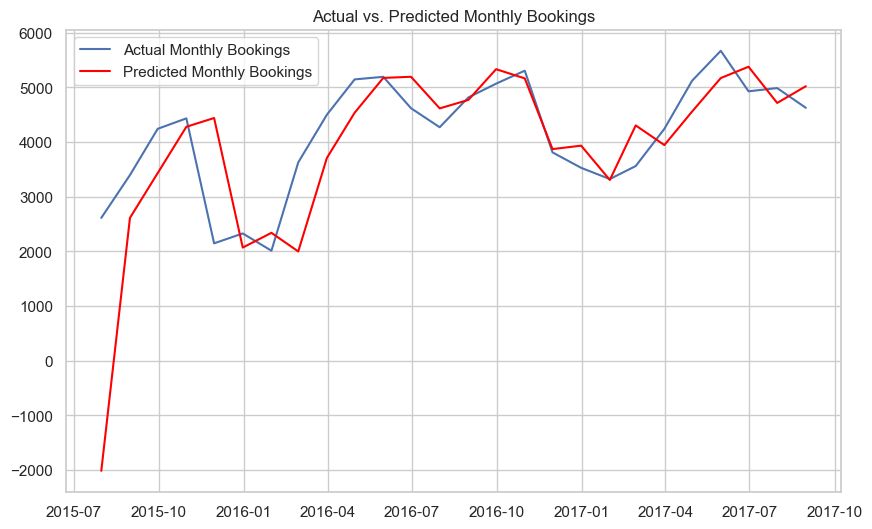

In [50]:
# Visualize the in-sample prediction results
plt.figure(figsize=(10, 6))
plt.plot(monthly_bookings_log.index, actual_values, label='Actual Monthly Bookings')
plt.plot(monthly_bookings_log.index, in_sample_forecast_mean, label='Predicted Monthly Bookings', color='red')
plt.legend()
plt.title('Actual vs. Predicted Monthly Bookings')
plt.show()

#### Conclusion
Given our objective of managing and predicting hotel booking volumes, the daily cycle model, due to its higher prediction accuracy, is more suitable for daily operations and short-term management decisions. Although the monthly cycle model theoretically fits better, it may not be accurate enough for practical forecasting applications, which could hinder effective booking management and resource planning.  
Preliminary tests of time series autocorrelation (ACF) and partial autocorrelation (PACF) show that most lags are not significant, and the parameters of the model mostly have high p-values, which indeed may indicate that there is no significance in the data. the autocorrelation. We can consider using machine learning models and other variables to predict the number of reservations or whether to cancel reservations.  

__Daily Cycle Model (SARIMAX(0, 1, 1)x(0, 1, 1, 30)):__  
__AIC and BIC:__ Higher, indicating that the model may not be a very good fit for the data.  
__MSE and RMSE:__ Relatively lower (10628.771 and 103.096), indicating that the model has a high prediction accuracy for daily data.  
__Monthly Cycle Model (SARIMAX(0, 1, 1)x(0, 0, 1, 12)):__  
__AIC and BIC:__ Significantly lower, which usually means a better model fit.  
__MSE and RMSE:__ Significantly higher (1312665.261 and 1145.716), indicating that the model has a large prediction error for monthly data.  


